# KL Divergence

In this quick tutorial we will learn what is KL divergence and how we can use it.

In [24]:
import matplotlib.pyplot as pylab
import numpy as np
from scipy.misc import factorial

## Space Worm Teeth Distribution

Here we plot the teeth distribution of the space worms.

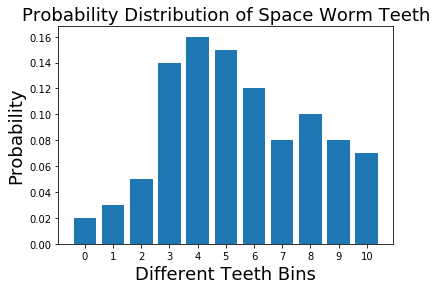

In [73]:
true_data = [0.02, 0.03, 0.05, 0.14, 0.16, 0.15, 0.12, 0.08, 0.1, 0.08, 0.07]
assert sum(true_data)==1.0

pylab.bar(np.arange(len(true_data)),true_data)
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.show()

## Approximating the True Distribution with a Uniform Distribution

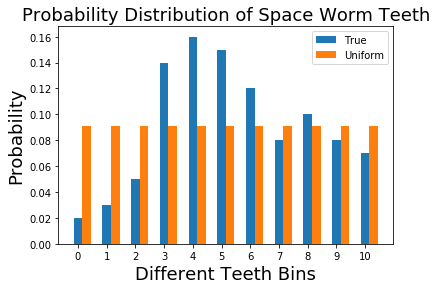

In [74]:
def get_unif_probability(n):
    return 1.0/n

unif_data = [get_unif_probability(11) for _ in range(11)]
width=0.3

pylab.bar(np.arange(len(true_data)),true_data,width=width,label='True')
pylab.bar(np.arange(len(true_data))+width,unif_data,width=width,label='Uniform')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

In [ ]:
## Approximating the True dis

Success probability:  0.5439999999999999


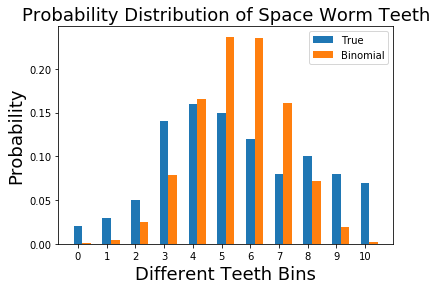

In [75]:
def get_bino_probability(mean,k,n):
    return (factorial(n)/(factorial(k)*factorial(n-k)))*(mean**k)*((1.0-mean)**(n-k))

def get_bino_success(true_data,n):
    return np.sum(np.array(true_data)*np.arange(len(true_data)))/10.0

n_trials = 10
succ = get_bino_success(true_data,n_trials)
print('Success probability: ',succ)

bino_data = [get_bino_probability(succ,k,n_trials) for k in range(11)]

width=0.3

pylab.bar(np.arange(len(true_data)),true_data,width=width,label='True')
pylab.bar(np.arange(len(true_data))+width,bino_data,width=width,label='Binomial')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

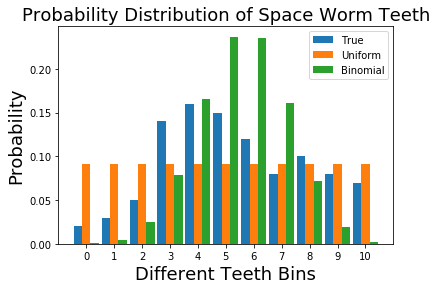

In [76]:
pylab.bar(np.arange(len(true_data))-width,true_data,width=width,label='True')
pylab.bar(np.arange(len(true_data)),unif_data,width=width,label='Uniform')
pylab.bar(np.arange(len(true_data))+width,bino_data,width=width,label='Binomial')
pylab.xlabel('Different Teeth Bins',fontsize=18)
pylab.title('Probability Distribution of Space Worm Teeth',fontsize=18)
pylab.ylabel('Probability',fontsize=18)
pylab.xticks(np.arange(len(true_data)))
pylab.legend()
pylab.show()

In [77]:
def get_klpq_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += pi*np.log(pi/qi)
    
    return kl_div

def get_klqp_div(p_probs, q_probs):
    kl_div = 0.0
    
    for pi, qi in zip(p_probs, q_probs):
        kl_div += qi*np.log(qi/pi)
    
    return kl_div

print('KL(True||Uniform): ',get_klpq_div(true_data,unif_data))
print('KL(True||Binomial): ',get_klpq_div(true_data,bino_data))



KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.42734972485619327


## Plotting KL-Divergence vs Different Binomial Probabilities

KL divergence at mean-delta:  0.4273698762199394
KL divergence at mean:  0.42734972485619327
KL divergence at mean+delta:  0.42736988575373996


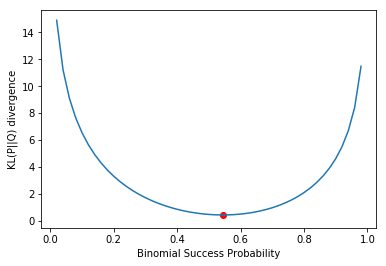

In [79]:
n_trials = 10
succ = get_bino_success(true_data,n_trials)

x = np.arange(0.02,1.0,0.02)

kl_divs = []
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    kl_divs.append(get_klpq_div(true_data, bino_data))

print('KL divergence at mean-delta: ', get_klpq_div(true_data,[get_bino_probability(succ-0.001, k, n_trials) for k in range(11)]))
print('KL divergence at mean: ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL divergence at mean+delta: ', get_klpq_div(true_data,[get_bino_probability(succ+0.001, k, n_trials) for k in range(11)]))
pylab.plot(x,kl_divs)
# we plot our choice for the binomial success probability on the same curve
pylab.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
pylab.xlabel('Binomial Success Probability')
pylab.ylabel('KL(P||Q) divergence')
pylab.show()

## KL(P||Q) vs KL(Q||P)

KL(P||Q):  0.42734972485619327
KL(Q||P):  0.2519548471987832


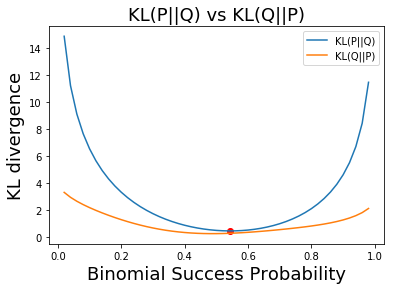

In [97]:
x = np.arange(0.02,1.0,0.02)

klpq_divs,klqp_divs = [],[]
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    klpq_divs.append(get_klpq_div(true_data, bino_data))
    klqp_divs.append(get_klqp_div(true_data, bino_data))

print('KL(P||Q): ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL(Q||P): ', get_klqp_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))

pylab.plot(x,klpq_divs,label='KL(P||Q)')
pylab.plot(x,klqp_divs,label='KL(Q||P)')
pylab.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
pylab.xlabel('Binomial Success Probability',fontsize=18)
pylab.ylabel('KL divergence',fontsize=18)
pylab.title('KL(P||Q) vs KL(Q||P)',fontsize=18)
pylab.legend()
pylab.show()

KL(P||Q):  0.42734972485619327
KL(Q||P):  0.2519548471987832


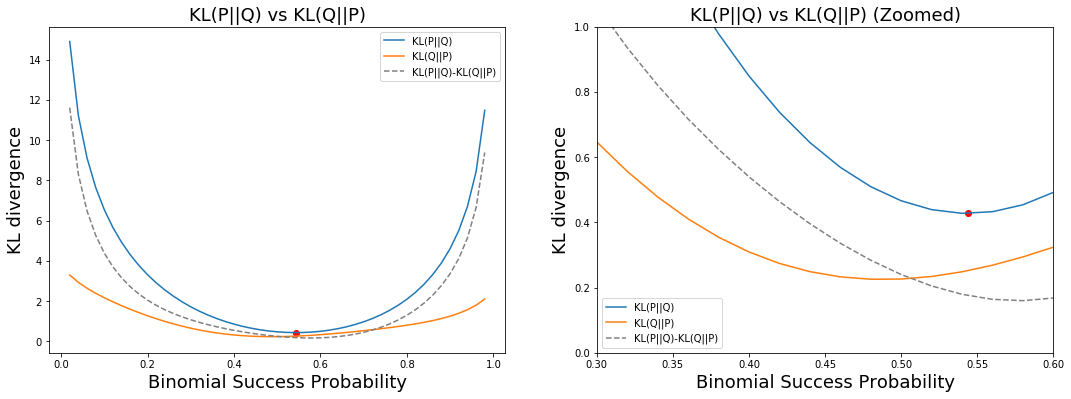

In [94]:
x = np.arange(0.02,1.0,0.02)

klpq_divs,klqp_divs = [],[]
for xi in x:
    bino_data = [get_bino_probability(xi, k, n_trials) for k in range(11)]
    klpq_divs.append(get_klpq_div(true_data, bino_data))
    klqp_divs.append(get_klqp_div(true_data, bino_data))

print('KL(P||Q): ', get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))
print('KL(Q||P): ', get_klqp_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]))

pylab.figure(figsize=(18,6))
pylab.subplot(121)
pylab.plot(x,klpq_divs,label='KL(P||Q)')
pylab.plot(x,klqp_divs,label='KL(Q||P)')
pylab.plot(x,np.array(klpq_divs)-np.array(klqp_divs),linestyle='--',color='gray',label='KL(P||Q)-KL(Q||P)')
pylab.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
pylab.xlabel('Binomial Success Probability',fontsize=18)
pylab.ylabel('KL divergence',fontsize=18)
pylab.title('KL(P||Q) vs KL(Q||P)',fontsize=18)
pylab.legend()

pylab.subplot(122)
pylab.plot(x,klpq_divs,label='KL(P||Q)')
pylab.plot(x,klqp_divs,label='KL(Q||P)')
pylab.plot(x,np.array(klpq_divs)-np.array(klqp_divs),linestyle='--',color='gray',label='KL(P||Q)-KL(Q||P)')
pylab.scatter(succ,get_klpq_div(true_data,[get_bino_probability(succ, k, n_trials) for k in range(11)]),color='r')
pylab.xlabel('Binomial Success Probability',fontsize=18)
pylab.ylabel('KL divergence',fontsize=18)
pylab.title('KL(P||Q) vs KL(Q||P) (Zoomed)',fontsize=18)
pylab.xlim([0.3,0.6])
pylab.ylim([0.0,1.0])
pylab.legend()

pylab.show()